In [1]:
# =============================================================================
# # 1. SETUP: IMPORTING LIBRARIES
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Set a visual style for the plots
sns.set_style("whitegrid")

In [3]:
# =============================================================================
# # 2. DATA LOADING AND INSPECTION
# =============================================================================
# Load the built-in Digits dataset from Scikit-learn
digits = load_digits()
X = digits.data
y = digits.target

print("--- Shape of the Original Data ---")
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nThis means we have {X.shape[0]} images, and each image has {X.shape[1]} features (8x8 pixels flattened).")


--- Shape of the Original Data ---
Features (X) shape: (1797, 64)
Target (y) shape: (1797,)

This means we have 1797 images, and each image has 64 features (8x8 pixels flattened).


In [5]:
# =============================================================================
# # 3. DATA SCALING (CRITICAL STEP FOR PCA)
# =============================================================================
# PCA is affected by scale, so you need to scale the features before applying PCA.
# We will standardize the data to have a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("--- Data Scaling Complete ---")
print("Data has been standardized.")

--- Data Scaling Complete ---
Data has been standardized.


In [6]:
# =============================================================================
# # 4. APPLYING PRINCIPAL COMPONENT ANALYSIS (PCA)
# =============================================================================
# We want to reduce our 64 dimensions down to just 2 for visualization.
pca = PCA(n_components=2)

# Fit PCA on the scaled data and transform it
X_pca = pca.fit_transform(X_scaled)

print("--- PCA Complete ---")
print(f"Shape of data after PCA: {X_pca.shape}")
print("We have successfully reduced 64 dimensions to 2!")

--- PCA Complete ---
Shape of data after PCA: (1797, 2)
We have successfully reduced 64 dimensions to 2!


--- First 5 Rows of PCA DataFrame ---
   Principal Component 1  Principal Component 2  Digit
0              -1.914214              -0.954502      0
1              -0.588980               0.924636      1
2              -1.302039              -0.317189      2
3               3.020770              -0.868772      3
4              -4.528949              -1.093480      4


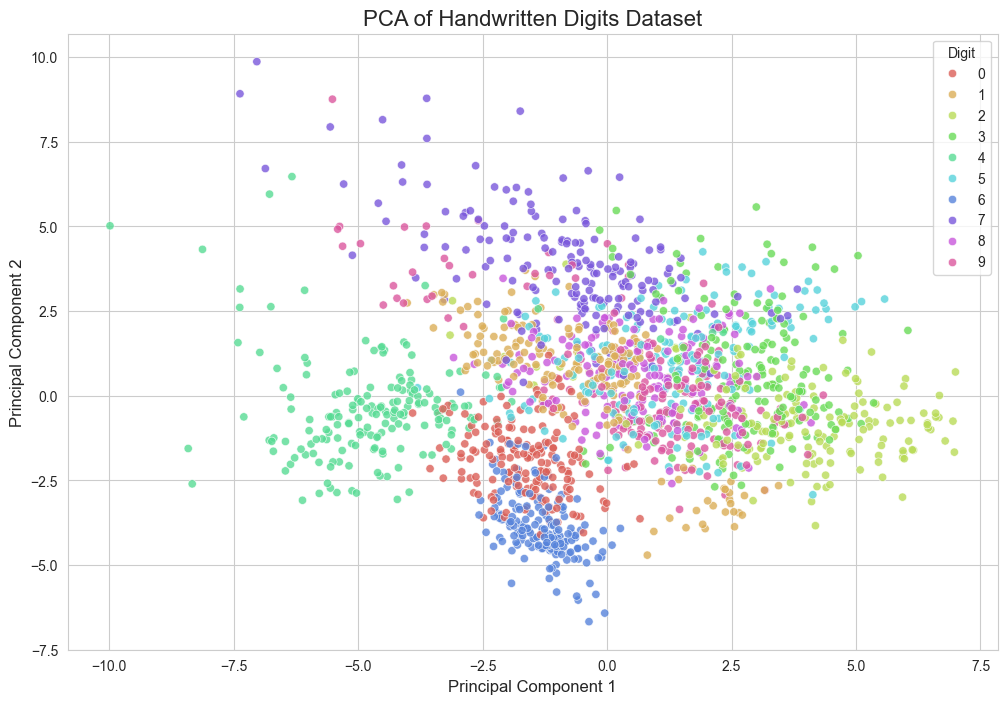

In [8]:
# =============================================================================
# # 5. VISUALIZING THE PCA RESULTS
# =============================================================================
# Create a new DataFrame with the two principal components and the original digit labels
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Digit'] = y

print("--- First 5 Rows of PCA DataFrame ---")
print(pca_df.head())

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="Principal Component 1", y="Principal Component 2",
    hue="Digit",
    palette=sns.color_palette("hls", 10), # Use a color palette with 10 distinct colors
    data=pca_df,
    legend="full",
    alpha=0.8
)

plt.title('PCA of Handwritten Digits Dataset', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Digit')
plt.savefig('pca_digit_visualization.png') # Save this plot for LinkedIn
plt.show()